IMPORTS

In [1]:
%matplotlib inline  
import os
import numpy as np
import matplotlib.pyplot as plt
from smt.applications import EGO

import matplotlib.font_manager

import warnings
warnings.filterwarnings("ignore")
     
from scipy.stats import norm
from scipy.optimize import minimize

from smt.utils.options_dictionary import OptionsDictionary
from smt.applications.application import SurrogateBasedApplication
from smt.utils.misc import compute_rms_error

from smt.surrogate_models import KPLS, KRG, KPLSK
from smt.sampling_methods import LHS
from  case_generator2 import _import_case


In [2]:
namefun=['Branin_5','Set_1','Set_2','Wong1','Branin_1','Branin_2','Goldstein_1','Cos_1','Spiral','EVD52','Rosen-Suzuki']
suffix_xsave = '_xsave.npy'
suffix_ysave = '_ysave.npy'

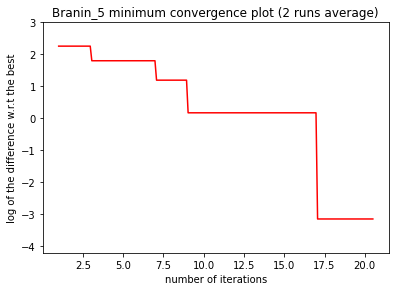

[0.5084579  0.56582087]


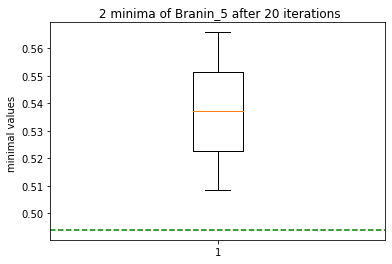

0.5084579016434372


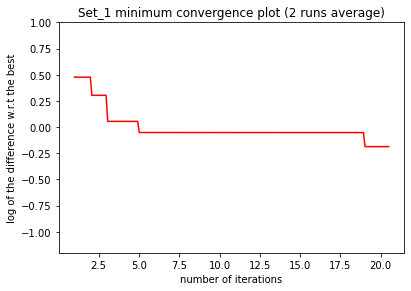

[-0.73861602 -2.26049889]


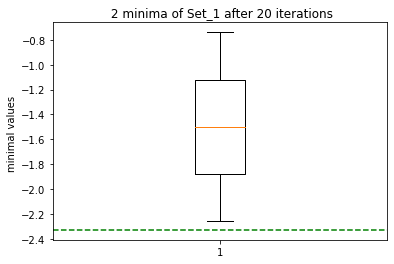

-2.2604988918393403


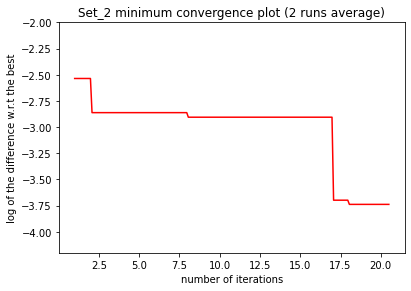

[-0.6416396  -0.64221946]


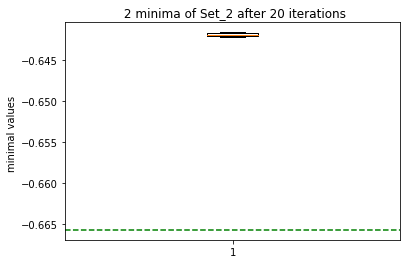

-0.642219461438579


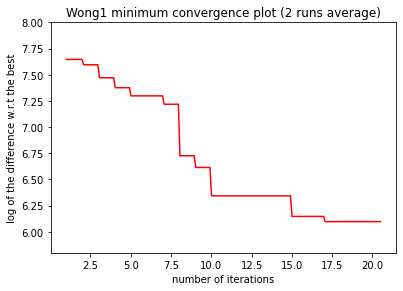

[-1974.95546166 -1914.67049085]


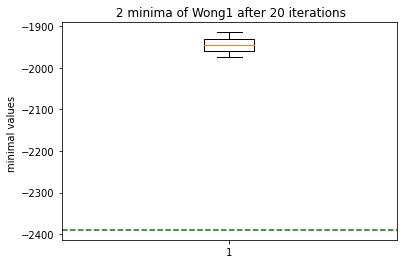

-1974.9554616580883


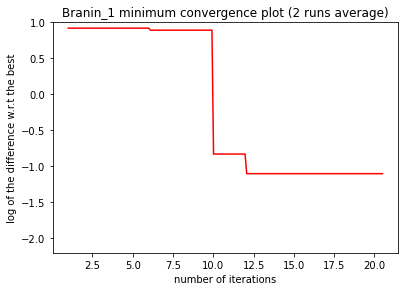

[-3.85213319 -4.51720727]


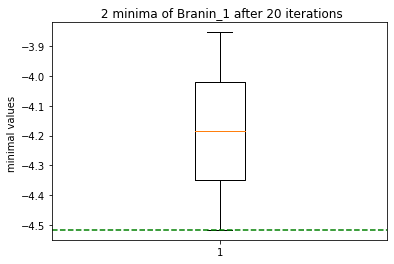

-4.517207270143658


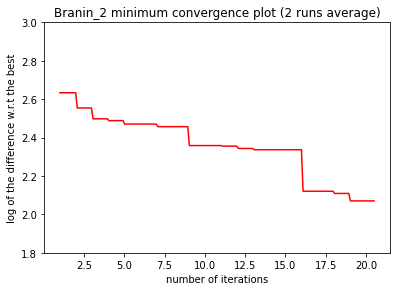

[-11.83460013  -0.68335221]


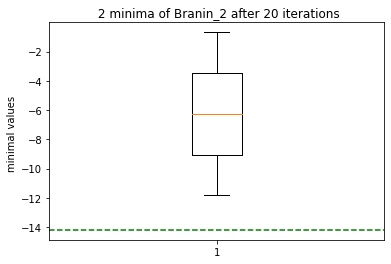

-11.834600130472541


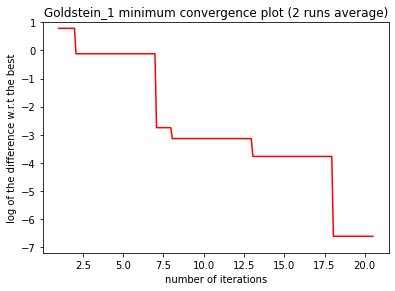

[38.08732118 38.08485479]


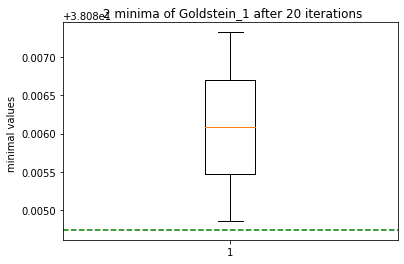

38.0848547885079


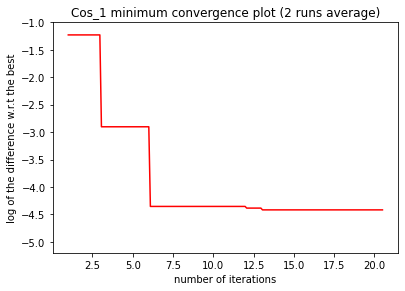

[-0.97588477 -0.99998872]


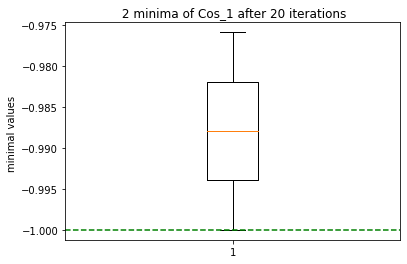

-0.9999887238477337


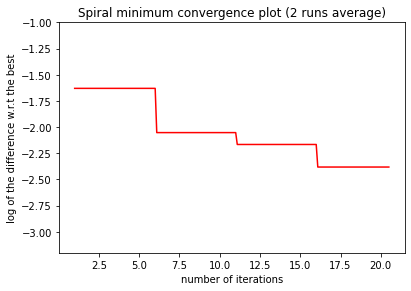

[0.02756702 0.1573331 ]


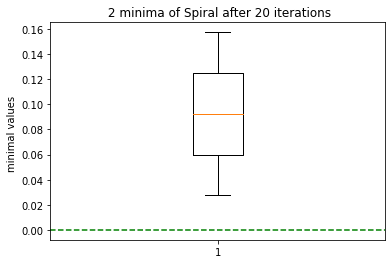

0.02756702180793305


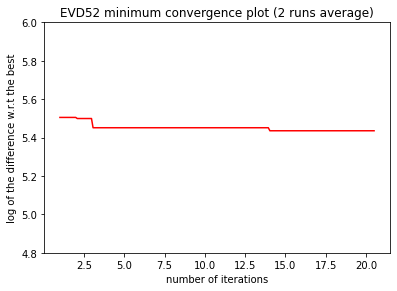

[-20.00000245 -20.        ]


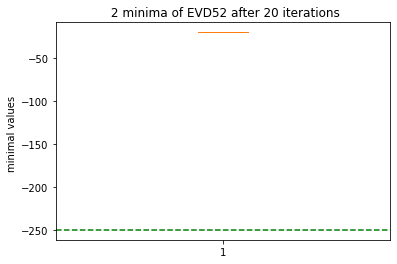

-20.000002445235662


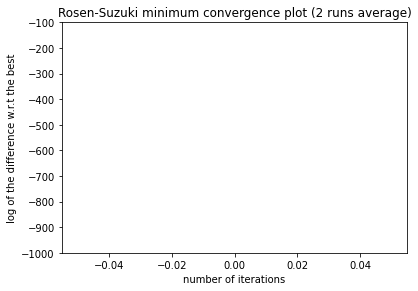

[245. 245.]


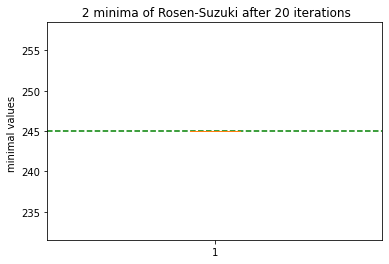

245.0
[17 21  1 21 21 21  7  3  6 21  1]


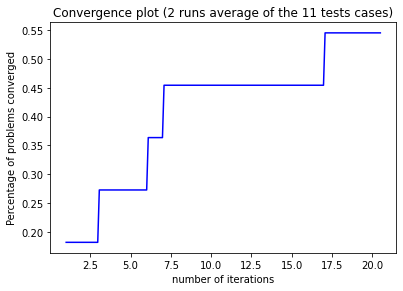

In [3]:
n_optim=2
n_doe=3
n_iter=20
p=[]
nb_pt_plot=10*n_iter
for base_save in namefun:
    converge=0
    
    dir_name='./results/'+base_save+"/"
   
    case=_import_case(base_save)()
    sol = case['sol']['value']
    
    
    y_data=np.zeros((n_optim,n_iter+n_doe))
    mini=np.zeros((n_optim,n_iter))
    for k in range(n_optim):
        filename= os.path.join(dir_name, base_save+"_"+str(k) +"_optim"+  suffix_ysave)
        yl=np.load(filename) 
        y_data[k,:]=yl.T[0]
        for i in range(n_iter) : 
            mini[k,i]=(np.min(yl[0:n_doe+i+1]))
    print        
    Moy_mini=mini.sum(axis=0)/n_optim
    y_opt=mini[:,-1]

    x_plot = np.linspace(1,n_iter+0.5, nb_pt_plot)
    y_plot_min=np.copy(x_plot)
    cst= np.linspace(sol,sol, nb_pt_plot)
    for i in range(nb_pt_plot) :
        y_plot_min[i]=np.log(np.abs(Moy_mini[int(np.floor(x_plot[i]))-1]-sol))
        if (y_plot_min[i] < -2 and not(converge)) : 
            converge=1 
            p.append(int(np.floor(x_plot[i])))

    if not(converge) :
        p.append(n_iter+1)
        
    u= max(np.floor(max(y_plot_min))+1,-100)
    l= max(np.floor(min(y_plot_min))-.2,-1000)
    fig= plt.figure()
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    epm, = axes.plot(x_plot,y_plot_min,color='r')
    axes.set_ylim([l,u])
    plt.title("{func} minimum convergence plot ({nopt} runs average)".format(func=base_save, nopt=n_optim), loc='center')
    plt.xlabel("number of iterations")
    plt.ylabel("log of the difference w.r.t the best")

    plt.savefig("./results/"+base_save+"/minimum convergence plot",dpi=300,quality=99)
      
    
    plt.show()
    plt.figure()
    plt.boxplot(y_opt)
    print(y_opt)
    plt.title(" {nopt} minima of {func} after {niter} iterations".format(func=base_save, nopt=n_optim, niter=n_iter), loc='center')
    plt.plot(np.linspace(0.5,1.5,nb_pt_plot),cst,color='g',linestyle='--')
    plt.ylabel("minimal values ")
    plt.savefig("./results/"+base_save+"/minima after optim",dpi=300,quality=99)
    plt.show()
    print(np.min(y_opt))

p=np.array(p)
print(p)
for i in range(nb_pt_plot) :
    y_plot_min[i]=np.count_nonzero( ( p<=(int(np.floor(x_plot[i]))) )  )/np.shape(p)[0]

fig= plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
epm, = axes.plot(x_plot,y_plot_min,color='b')

plt.title("Convergence plot ({nopt} runs average of the 11 tests cases)".format(func=base_save, nopt=n_optim), loc='center')
plt.xlabel("number of iterations")
plt.ylabel("Percentage of problems converged")

plt.savefig("./results/overall problems convergence plot",dpi=300,quality=99)

plt.show()

